In [ ]:
!wget = 'https://github.com/dhairya0904/Multivariate-time-series-prediction/raw/master/raw.csv'

--2021-01-01 03:58:05--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-01-01 03:58:05--  https://github.com/dhairya0904/Multivariate-time-series-prediction/raw/master/raw.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhairya0904/Multivariate-time-series-prediction/master/raw.csv [following]
--2021-01-01 03:58:05--  https://raw.githubusercontent.com/dhairya0904/Multivariate-time-series-prediction/master/raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010494 (1.9M) [text/plain]
Saving to: ‘raw.csv’

raw.csv             100

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.plot(df.Ir)

In [ ]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')


In [ ]:
data = pd.read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

In [ ]:
data.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
data['pm2.5'].fillna(0, inplace=True)

In [ ]:
data.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
new=data.drop('No',axis=1)

In [ ]:
new.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
new.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
new.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


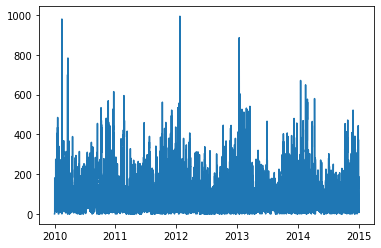

In [ ]:
import matplotlib.pyplot as plt
plt.plot(new.pollution)

In [ ]:
data.index.name = 'date'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


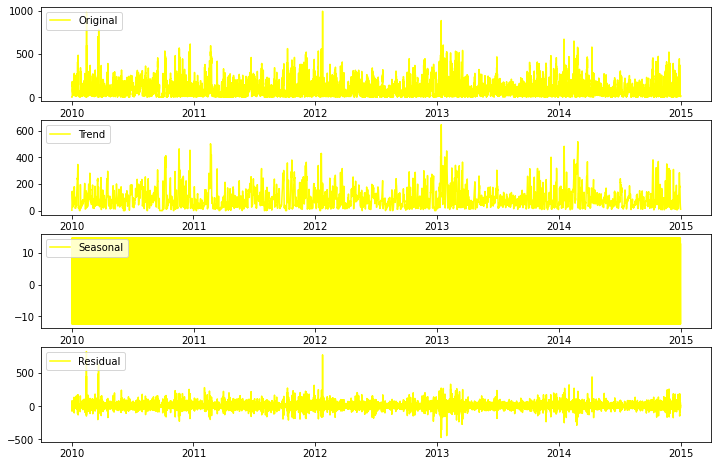

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(new['pollution'],model ='additive',)
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(new['pollution'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

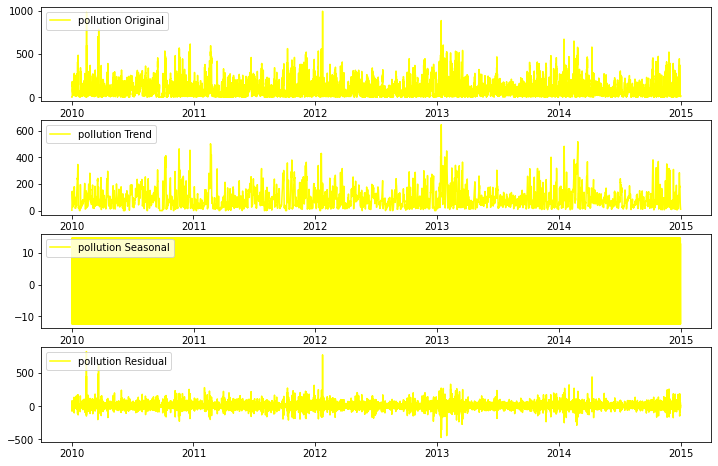

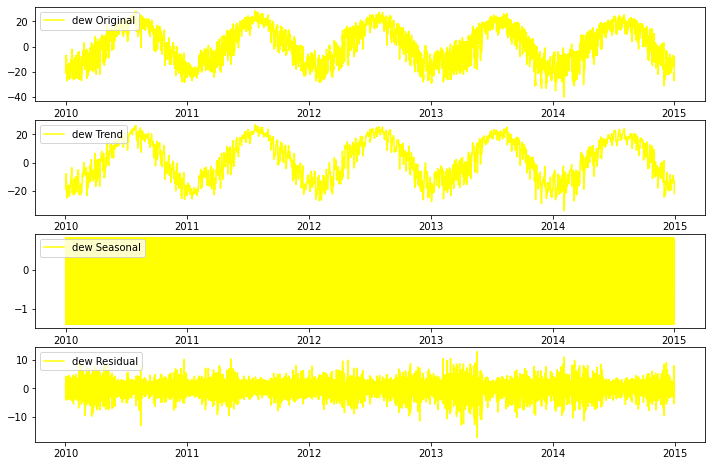

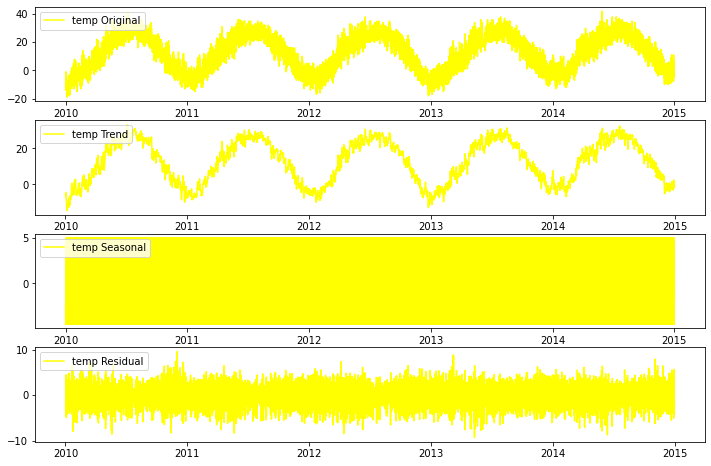

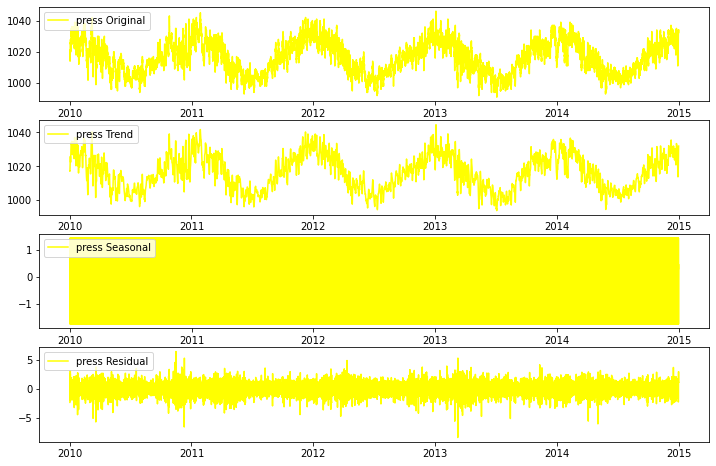

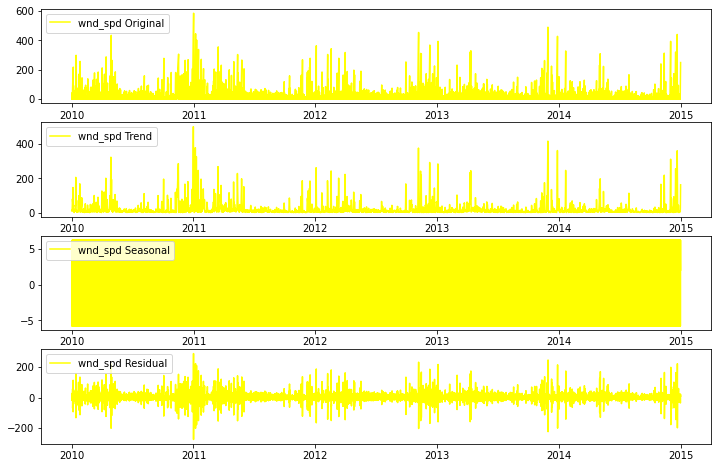

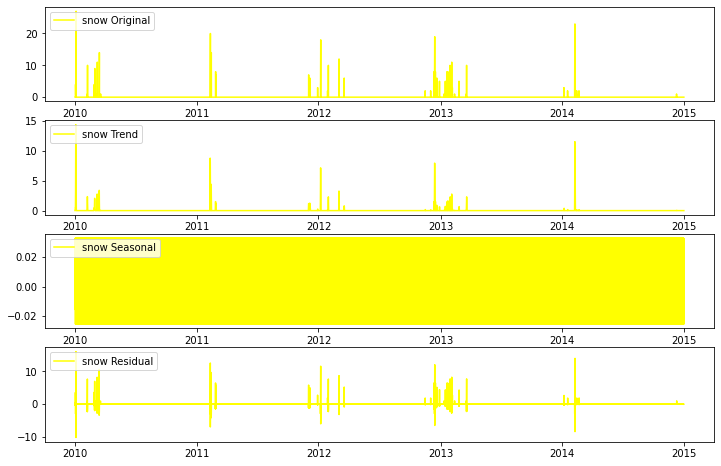

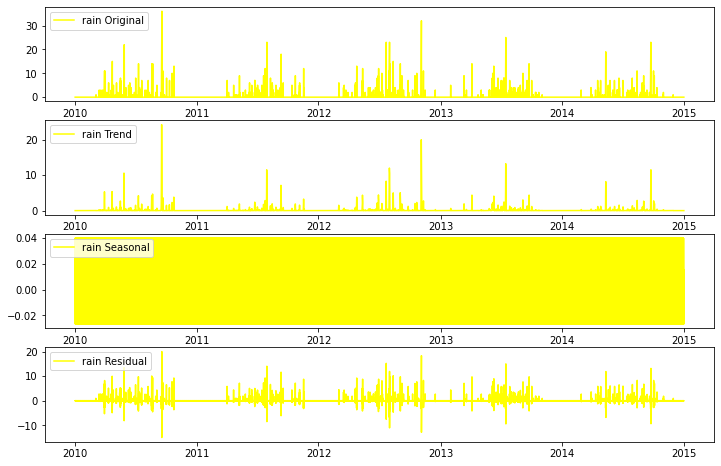

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 
labels=['pollution', 'dew', 'temp', 'press','wnd_spd', 'snow', 'rain']
for label in labels:

  decomposed = seasonal_decompose(new[label],model ='additive',)
  trend = decomposed.trend
  seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
  residual = decomposed.resid

  plt.figure(figsize=(12,8))
  plt.subplot(411)
  plt.plot(new[label], label=label+' Original', color='yellow')
  plt.legend(loc='upper left')
  plt.subplot(412)
  plt.plot(trend, label=label+' Trend', color='yellow')
  plt.legend(loc='upper left')
  plt.subplot(413)
  plt.plot(seasonal, label=label+' Seasonal', color='yellow')
  plt.legend(loc='upper left')
  plt.subplot(414)
  plt.plot(residual, label=label+' Residual', color='yellow')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
new.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
values = new.wnd_dir
encoder = LabelEncoder()

new['wnd_dir'] = encoder.fit_transform(values)
new.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1,12.97,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new.values)

In [ ]:
scaled[:,:3].shape

(43824, 3)

In [ ]:
x=scaled
y=scaled[:,:1]
x.shape,y.shape

((43824, 8), (43824, 1))

In [ ]:
# split into train and test sets
train_size = int(len(x) * 0.7)
test_size = len(x) - train_size
xtrain, xtest = x[0:train_size,:], x[train_size:len(x),:]
ytrain, ytest = y[0:train_size,:], y[train_size:len(x),:]
x.shape, xtrain.shape, xtest.shape,y.shape,ytrain.shape,ytest.shape


((43824, 8), (30676, 8), (13148, 8), (43824, 1), (30676, 1), (13148, 1))

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  10 
batch_size = 1
train_generator = TimeseriesGenerator(xtrain,ytrain,length=length,batch_size=batch_size)
test_generator = TimeseriesGenerator(xtest,ytest,length=length,batch_size=batch_size)

In [ ]:
train_generator[0][0].shape

(1, 10, 8)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, LSTM
model = Sequential()
num_features=8
model.add(LSTM(50, activation='tanh', input_shape=(length, num_features),return_sequences=True))
model.add(LSTM(25, activation='tanh'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            11800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 19,426
Trainable params: 19,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit_generator(generator=train_generator, verbose=1, epochs=50, validation_data=test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30666/30666 [==============================] - 172s 6ms/step - loss: 0.0019 - val_loss: 5.6797e-04
Epoch 2/50
30666/30666 [==============================] - 173s 6ms/step - loss: 9.5175e-04 - val_loss: 5.4525e-04
Epoch 3/50
30666/30666 [==============================] - 175s 6ms/step - loss: 8.3403e-04 - val_loss: 5.6204e-04
Epoch 4/50
11699/30666 [==========>...................] - ETA: 1:30 - loss: 8.7594e-04

KeyboardInterrupt: ignored

In [ ]:
trainPredict = model.predict(train_generator)


In [ ]:
testPredict = model.predict(test_generator)

In [ ]:
trainPredict.shape

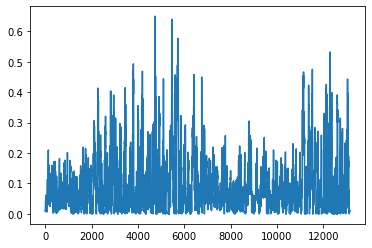

In [ ]:
plt.plot(testPredict)
plt.show()

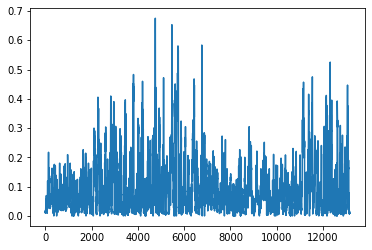

In [ ]:
plt.plot(ytest)
plt.show()

In [ ]:
import numpy as np

In [ ]:
arrays =[testPredict for _ in range(8)]
array=np.stack(arrays, axis=1)
array.shape

(13138, 8, 1)

In [ ]:
testPredict=np.reshape(array,(13138,8))

In [ ]:
y_test =[ytest for _ in range(8)]
y_test=np.stack(y_test, axis=1)
y_test.shape

(13148, 8, 1)

In [ ]:
y_test=np.reshape(y_test,(13148,8))

In [ ]:
testPredict = scaler.inverse_transform(testPredict)



In [ ]:
testY_inverse = scaler.inverse_transform(y_test)

In [ ]:
y_test

array([[0.00968696, 0.00968696, 0.00968696, ..., 0.00968696, 0.00968696,
        0.00968696],
       [0.0083534 , 0.0083534 , 0.0083534 , ..., 0.0083534 , 0.0083534 ,
        0.0083534 ],
       [0.01091324, 0.01091324, 0.01091324, ..., 0.01091324, 0.01091324,
        0.01091324],
       ...,
       [0.01113573, 0.01113573, 0.01113573, ..., 0.01113573, 0.01113573,
        0.01113573],
       [0.01076391, 0.01076391, 0.01076391, ..., 0.01076391, 0.01076391,
        0.01076391],
       [0.00985086, 0.00985086, 0.00985086, ..., 0.00985086, 0.00985086,
        0.00985086]], dtype=float32)

In [ ]:
testY_inverse[:,0].shape,testPredict.shape

((13138,), (13138, 8))

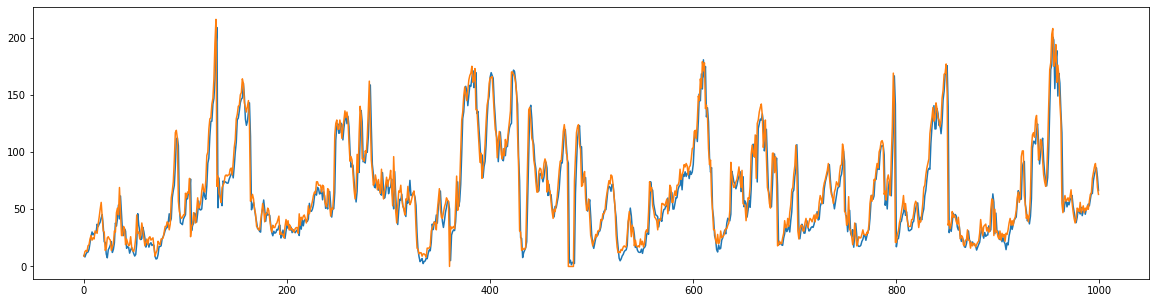

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(testPredict[:,0][:1000])
plt.plot(testY_inverse[:,0][10:1010])

